<div style="float:right">
<img src="https://www.ugent.be/++theme++ugent/static/images/logo_ugent_nl.svg" style="height:150px">
<img src="https://opendreamkit.org/public/logos/odk-elected-logo.svg" style="height:150px">
<img src="https://opendreamkit.org/public/logos/Flag_of_Europe.svg" style="height:150px">
</div>

# cypari2: Python bindings for PARI/GP

### Jeroen Demeyer

### Universiteit Gent / OpenDreamKit

(joint work with Vincent Delecroix, Luca De Feo, Vincent Klein, …)

## Quick examples

In [1]:
from cypari2 import Pari
pari = Pari()
pari.zeta(2)

1.64493406684823

In [3]:
pari.ellinit([-112, 400]).ellanalyticrank()

[3, 10.3910994007158]

## Plotting (using SVG images)

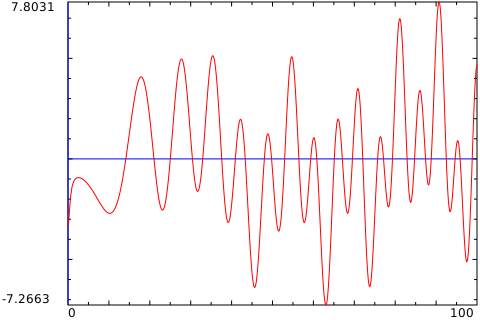

[0.E-307, 100.000000000000, -7.26626527057968, 7.80311802062338]

In [11]:
pari("my(Z=lfuninit(1, [100])); ploth(x=0, 100, lfunhardy(Z,x))")

## Python interaction

In [12]:
discs = set(pari.quaddisc(-1-n) for n in range(200))
sorted([D for D in discs if D.qfbclassno() == 1], reverse=True)

[-3, -4, -7, -8, -11, -19, -43, -67, -163]

In [13]:
def cube(x):
    return x**3

pari.apply(cube, range(10))

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

## Errors

In [7]:
1 / pari.Mod(4, 6)

PariError: impossible inverse in Fp_inv: Mod(2, 6)

## Implementation

`cypari2` is written in Cython, a Python-like language compiling to C (like `gp2c` but for Python)

PARI objects (`GEN`) are wrapped in a Python object `Gen` (independent of the PARI type):

In [9]:
x = pari.pi()
print(type(x))
print(x.type())

<type 'cypari2.gen.Gen'>
t_REAL


## Auto-generation

Cython code wrapping most GP functions is auto-generated from `pari.desc`. Example:
```
Function: cos
Class: basic
Section: transcendental
C-Name: gcos
Prototype: Gp
Help: cos(x): cosine of x.
Doc: cosine of $x$.
```

This becomes
```cython
    def cos(self, x, long precision=0):
        r'''
        Cosine of :math:`x`.
        '''
        x = objtogen(x)
        sig_on()
        cdef GEN _x = (<Gen>x).g
        precision = prec_bits_to_words(precision)
        cdef GEN _ret = gcos(_x, precision)
        return new_gen(_ret)
```

## Performance

`cypari2` is very fast:

- Cython allows direct C calls to the PARI library
- Objects remain on the PARI stack if possible, no needless copying
  (several unsafe operations require copying anyway: resizing PARI stack, getting/setting entry of vector/matrix)

Only overhead comes from dealing with Python objects and methods

## History (a.k.a. why is it called `cypari2`?)

- ≤ 2006: Very early versions of SageMath using Pyrex/Cython wrappers of PARI
- 2012: Marc Culler and Nathan Dunfield forked these into a separate Python package `cypari` (to use it with their `SnapPy` topology package)
- 2015: auto-generation of wrappers in SageMath
- 2016: these were made into a separate package `cypari2`
- 2018: `cypari2` version 2 released, keeping `GEN`s on the PARI stack instead of always copying
- `cypari` and `cypari2` are still separate packages because of build/packaging issues and Windows compatibility of `cysignals`

## TODO

- better support for functions
- support iterators (problem: PARI/GP iterators are not easily usable from C)
- support attributes like `.clgp` (problem: `omega()` versus `.omega` incompatibility)
- slicing (`M[,1]` for a matrix `M`) 

## Try it!

Assuming Python ≥ 2.7 and PARI/GP version ≥ 2.9.4 (installed in a location where Python will find it):
```
pip install cypari2
```

...or use SageMath.

Sources: https://github.com/defeo/cypari2